<a href="https://colab.research.google.com/github/boyerb/Investments/blob/master/Ex07-Alpha_Vantage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Investments: Theory, Fundamental Analysis, and Data Driven Analytics**, Bates, Boyer, and Fletcher

# Examples Chapter 7: The Alpha Vantage API
In this example we illustrate how to load in data using the Alpha vantage API. We then plot the closing price for Coca-Cola (ticker:'KO').

### Imports and Setup
We begin by importing `requests` for retrieving data and `pandas` for handling DataFrames. To improve readability when printing a DataFrame to the consol, we then configure Pandas display options: (1) show all columns without truncation, (2) widen the output to 1000 characters so rows print on a single line, and (3) truncate long tables.


In [1]:
!curl -O https://raw.githubusercontent.com/boyerb/Investments/master/functions/simple_finance.py
import simple_finance as sf
import requests
import pandas as pd
pd.set_option('display.max_columns', None)   # Show all columns without truncation
pd.set_option('display.width', 1000)   # Set the display width so output stays on one line
pd.set_option("display.max_rows", 20) # Force truncation if DataFrame has more than 20 rows


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32142  100 32142    0     0   193k      0 --:--:-- --:--:-- --:--:--  193k


### Load in Data Using the API
You will first need to get your own API key to run this block of code at this link: https://www.alphavantage.co/support/#api-key.  If you don't supply your own API key, the code will still run, but the number of daily requests will be **limited by IP address**.

When using this block of code in other programs remember to
1. Replace `symbol=KO` in the url string with the symbol for which you want data.
2. Replace `your_key` in the script with your actual key.  

In [2]:
# Define the API endpoint URL
# The 'symbol' parameter specifies the ticker (KO = Coca-Cola).
# Replace 'your_key' with your personal Alpha Vantage API key.
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol=KO&apikey=your_key'

# Send an HTTP GET request to the API endpoint
r = requests.get(url)
df = sf.parse_monthly_alpha_vantage_response(r)
print(df)

AttributeError: 'Index' object has no attribute 'to_period'

### Format the Data
We now format the data from Alpha Vantage and turn it into a DataFrame.  Understanding all the details of this section is not essential, and you can use this block of code as-is when retrieving data for other tickers.   

In [3]:

# Step 1: Convert the JSON response body into a Python dictionary.
# At this point, 'data' will be a nested dictionary containing
# both metadata and the monthly adjusted time series.
data = r.json()

# Step 2: Access the part of the API response corresponding
# specifically to the monthly adjusted stock data.
# This section uses dates as keys and stores open, high, low, close,
# adjusted close, volume, and dividend info for each month.
ts_data = data["Monthly Adjusted Time Series"]

# Step 3: Convert the time series dictionary into a Pandas DataFrame.
# Using orient="index" tells Pandas to use the dictionary keys (dates)
# as the DataFrame index, so each row corresponds to one month.
df = pd.DataFrame.from_dict(ts_data, orient="index")

# Step 4: Rename columns to something cleaner
df.columns = [
    "Open", "High", "Low", "Close",
    "Adjusted Close", "Volume", "Dividend Amount"
]

#Step 6: Convert index to datetime and sort chronologically
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Step 5: Convert string values into numeric floats.
# When the DataFrame is first created, all values are stored as text (strings),
# because the JSON response encodes numbers as strings by default.
# This conversion is essential because mathematical operations,
# statistical analysis, and plotting require numeric types, not strings.
df = df.astype(float)

print(df)

              Open    High      Low  Close  Adjusted Close       Volume  Dividend Amount
1999-12-31  66.690  69.000  57.3800  58.25         14.2834  115452600.0             0.00
2000-01-31  57.310  66.880  55.2500  57.44         14.0848  112247600.0             0.00
2000-02-29  57.750  58.380  47.5600  48.63         11.9245   94966900.0             0.00
2000-03-31  49.190  51.810  42.8800  46.94         11.5548  151868400.0             0.17
2000-04-28  47.440  52.380  44.7500  47.25         11.6311  120064900.0             0.00
...            ...     ...      ...    ...             ...          ...              ...
2025-06-30  72.025  72.685  68.7800  70.75         70.2092  325009841.0             0.51
2025-07-31  70.990  72.450  67.7400  67.89         67.3711  358551516.0             0.00
2025-08-29  68.595  71.705  68.2700  68.99         68.4626  271343743.0             0.00
2025-09-30  68.960  69.460  65.3538  66.32         66.3200  389362886.0             0.51
2025-10-06  66.505  6

### Plot Closing Price for Coca-Cola

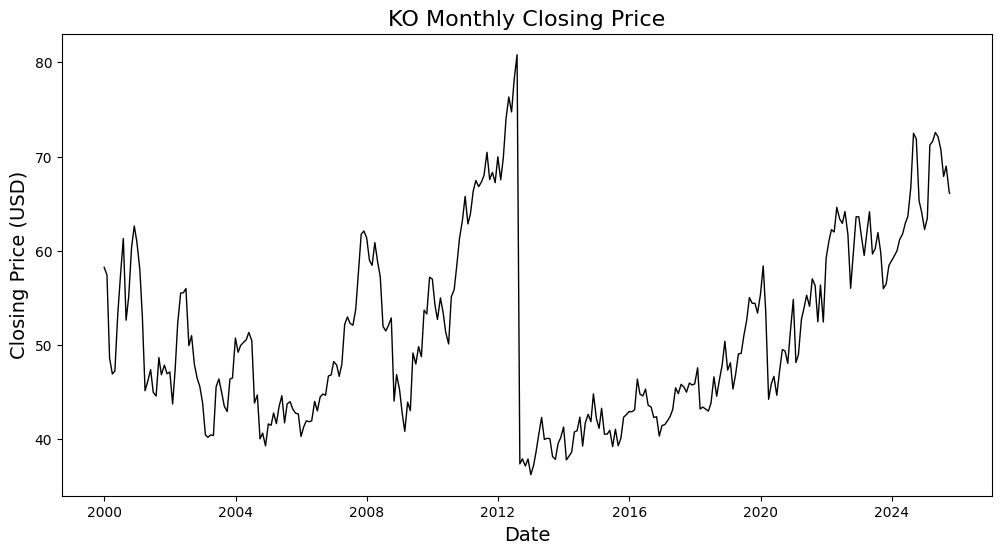

In [4]:
import matplotlib.pyplot as plt

# Plot monthly close price
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], color="black", linewidth=1)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Closing Price (USD)", fontsize=14)
plt.title("KO Monthly Closing Price", fontsize=16)
plt.grid(False)  # cleaner look
plt.show()